#📚 Importación de bibliotecas

In [1]:
import pandas as pd
import requests

#📌 Extracción

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

#🔧 Transformación

In [3]:
from pandas import json_normalize
df_normalizado = json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Verificamos si hay valores unicos en cada columna
for columna in df_normalizado.columns:
  print(f"Valores unicos en la columna '{columna}':{df_normalizado[columna].nunique()}")
  if df_normalizado[columna].nunique() < 50: #Imprime valores solamente si hay
    print(df_normalizado[columna].unique())
    print('--' *25)

Valores unicos en la columna 'customerID':7267
Valores unicos en la columna 'Churn':3
['No' 'Yes' '']
--------------------------------------------------
Valores unicos en la columna 'customer.gender':2
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna 'customer.SeniorCitizen':2
[0 1]
--------------------------------------------------
Valores unicos en la columna 'customer.Partner':2
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna 'customer.Dependents':2
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna 'customer.tenure':73
Valores unicos en la columna 'phone.PhoneService':2
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna 'phone.MultipleLines':3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores unicos en la columna 'internet.InternetService':3
['DSL' 'Fiber optic' 'No'

In [6]:
#Verificacion de Datos duplicados:
duplicados = df_normalizado.duplicated().sum()
print(f"Cantidad de duplicados: {duplicados}")

Cantidad de duplicados: 0


In [7]:
#Verificacion de valores nulos
nulos = df_normalizado.isnull().values.sum()
print("\nValores nulos por columna:")
print(nulos[nulos > 0])


Valores nulos por columna:
[]


In [8]:
#Valores en blanco o vacios:
valores_b_vacio = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o vacios por columna:")
print(valores_b_vacio[valores_b_vacio > 0])


Valores en blanco o vacios por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [9]:
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

In [10]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [11]:
df = json_normalize(data, sep='.')

In [12]:
# Cambiamos la columna Charges total a float
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


In [13]:
# Eliminacion de columna Churn
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Numero de filas despues de eliminar Churn : ", len(df_normalizado))

Numero de filas despues de eliminar Churn :  7043


In [14]:
# Vacios en Blanco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [15]:
df_normalizado.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
# Tipos de Datos
print("\nTipos de datos por columna:")
print(df_normalizado.dtypes)


Tipos de datos por columna:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
dtype: object


In [17]:
#Crear Columnas cuentas diarias
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [18]:
# Renombrar columnas para facilitar el análisis
df.columns = df.columns.str.replace(r'^(customer\.|phone\.|internet\.|account\.)', '', regex=True)
df.columns = df.columns.str.replace('.', '_', regex=False).str.lower()

In [19]:
# Limpiar valores textuales
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

In [20]:
# Estandarizar valores como “sí/no” a binarios
df.replace({'yes': 1, 'no': 0}, inplace=True)

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_16092\1574286218.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)


In [21]:
df_normalizado = df_normalizado.drop('Cuentas_Diarias', errors='ignore')
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [22]:
print(df.columns.tolist())

['customerid', 'churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total']


In [23]:
df['contract'].value_counts()

contract
month-to-month    4005
two year          1743
one year          1519
Name: count, dtype: int64

#📊 Carga y análisis

In [24]:
#Analisis Descriptivo
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerid,7267,7267,0002-orfbo,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn,7267.0,3.0,0.0,5174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7267,2,male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
partner,7267.0,NaN,NaN,NaN,0.484106,0.499782,0.0,0.0,0.0,1.0,1.0
dependents,7267.0,NaN,NaN,NaN,0.300124,0.458343,0.0,0.0,0.0,1.0,1.0
tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phoneservice,7267.0,NaN,NaN,NaN,0.902711,0.296371,0.0,1.0,1.0,1.0,1.0
multiplelines,7267.0,3.0,0.0,3495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,7267,3,fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(f"Total de registros: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")
df.info()

Total de registros: 7267
Total de columnas: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 


C:\Users\DIEGO\AppData\Local\Temp\ipykernel_16092\1336539554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='Set2')


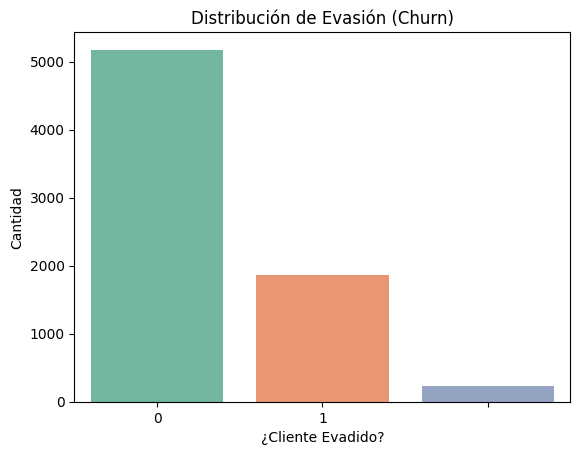

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('¿Cliente Evadido?')
plt.ylabel('Cantidad')
plt.show()

In [27]:
df['churn'].value_counts(normalize=True) * 100

churn
0    71.198569
1    25.719004
      3.082427
Name: proportion, dtype: float64

In [28]:
# Recuento por variables categoricas
categoricas = df.select_dtypes(include='object').columns.tolist()

for col in categoricas:
    print(f'\n>> Evasión según: {col}')
    print(pd.crosstab(df[col], df['churn'], normalize='index').round(2))


>> Evasión según: customerid
churn         0    1     
customerid               
0002-orfbo  1.0  0.0  0.0
0003-mknfe  1.0  0.0  0.0
0004-tlhlj  0.0  1.0  0.0
0011-igkff  0.0  1.0  0.0
0013-exchz  0.0  1.0  0.0
...         ...  ...  ...
9987-lutyd  1.0  0.0  0.0
9992-rramn  0.0  1.0  0.0
9992-ujoel  1.0  0.0  0.0
9993-lhieb  1.0  0.0  0.0
9995-hotoh  1.0  0.0  0.0

[7267 rows x 3 columns]

>> Evasión según: churn
churn    0    1     
churn               
0      1.0  0.0  0.0
1      0.0  1.0  0.0
       0.0  0.0  1.0

>> Evasión según: gender
churn      0     1      
gender                  
female  0.71  0.26  0.03
male    0.71  0.25  0.03

>> Evasión según: multiplelines
churn                0     1      
multiplelines                     
0                 0.73  0.24  0.03
1                 0.69  0.28  0.03
no phone service  0.72  0.24  0.04

>> Evasión según: internetservice
churn               0     1      
internetservice                  
0                0.89  0.07  0.03
dsl   

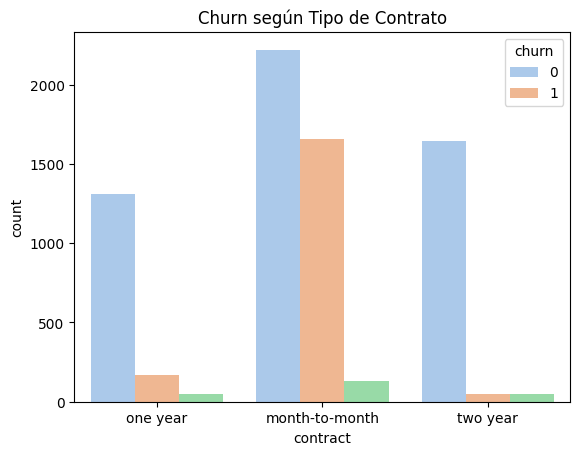

In [29]:
sns.countplot(x='contract', hue='churn', data=df, palette='pastel')
plt.title('Churn según Tipo de Contrato')
plt.show()

In [30]:
# 📈 Recuento por Variables Numéricas:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numericas:
    print(f'\n>> Estadísticas de {col} por churn:')
    print(df.groupby('churn')[col].describe())


>> Estadísticas de seniorcitizen por churn:
        count      mean       std  min  25%  50%  75%  max
churn                                                     
0      5174.0  0.128721  0.334923  0.0  0.0  0.0  0.0  1.0
1      1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0
        224.0  0.178571  0.383851  0.0  0.0  0.0  0.0  1.0

>> Estadísticas de partner por churn:
        count      mean       std  min  25%  50%  75%  max
churn                                                     
0      5174.0  0.528218  0.499251  0.0  0.0  1.0  1.0  1.0
1      1869.0  0.357945  0.479524  0.0  0.0  0.0  1.0  1.0
        224.0  0.517857  0.500800  0.0  0.0  1.0  1.0  1.0

>> Estadísticas de dependents por churn:
        count      mean       std  min  25%  50%  75%  max
churn                                                     
0      5174.0  0.344801  0.475349  0.0  0.0  0.0  1.0  1.0
1      1869.0  0.174425  0.379576  0.0  0.0  0.0  0.0  1.0
        224.0  0.316964  0.466335  0.0  0.0  0.0

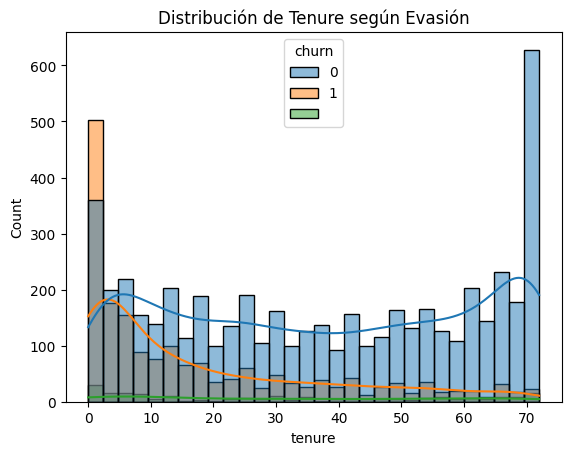

In [31]:
sns.histplot(data=df, x='tenure', hue='churn', kde=True, bins=30)
plt.title('Distribución de Tenure según Evasión')
plt.show()

In [32]:
import plotly.express as px

🔍 Análisis de Correlación – Exploración Adiciona

In [33]:
for col in df.columns:
    if df[col].dtype == 'object':
        # Verifica si hay valores vacíos que deberían ser numéricos
        if df[col].str.fullmatch(r'\d+(\.\d+)?').sum() > 0:
            print(f"❗ Columna sospechosa: {col}")
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass
numericas = df.select_dtypes(include=['int64', 'float64']).copy()
numericas['churn'] = df['churn']  # Asumiendo que ya es binaria
correlaciones = numericas.corr()
correlaciones['churn'].sort_values(ascending=False)

❗ Columna sospechosa: charges_total


churn               1.000000
charges_monthly     0.193356
paperlessbilling    0.191825
seniorcitizen       0.150889
multiplelines       0.040207
phoneservice        0.011942
streamingtv        -0.037057
streamingmovies    -0.040132
partner            -0.150448
dependents         -0.164221
deviceprotection   -0.177125
onlinebackup       -0.196061
charges_total      -0.199484
techsupport        -0.274422
onlinesecurity     -0.280816
tenure             -0.352229
customerid               NaN
gender                   NaN
internetservice          NaN
contract                 NaN
paymentmethod            NaN
Name: churn, dtype: float64

In [34]:
# Calculo de correlaciones
# Asegurar que 'churn' sea numérico
df['churn'] = df['churn'].replace({'yes': 1, 'no': 0})

# Seleccionar columnas numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).copy()

# Añadir 'churn' si no está
if 'churn' not in numericas.columns:
    numericas['churn'] = df['churn']

# Matriz de correlación
correlaciones = numericas.corr()

# Ver correlaciones con churn
correlacion_churn = correlaciones['churn'].sort_values(ascending=False)
print(correlacion_churn)

churn               1.000000
charges_monthly     0.193356
paperlessbilling    0.191825
seniorcitizen       0.150889
multiplelines       0.040207
phoneservice        0.011942
streamingtv        -0.037057
streamingmovies    -0.040132
partner            -0.150448
dependents         -0.164221
deviceprotection   -0.177125
onlinebackup       -0.196061
charges_total      -0.199484
techsupport        -0.274422
onlinesecurity     -0.280816
tenure             -0.352229
customerid               NaN
gender                   NaN
internetservice          NaN
contract                 NaN
paymentmethod            NaN
Name: churn, dtype: float64


📊 Visualización con Heatmap

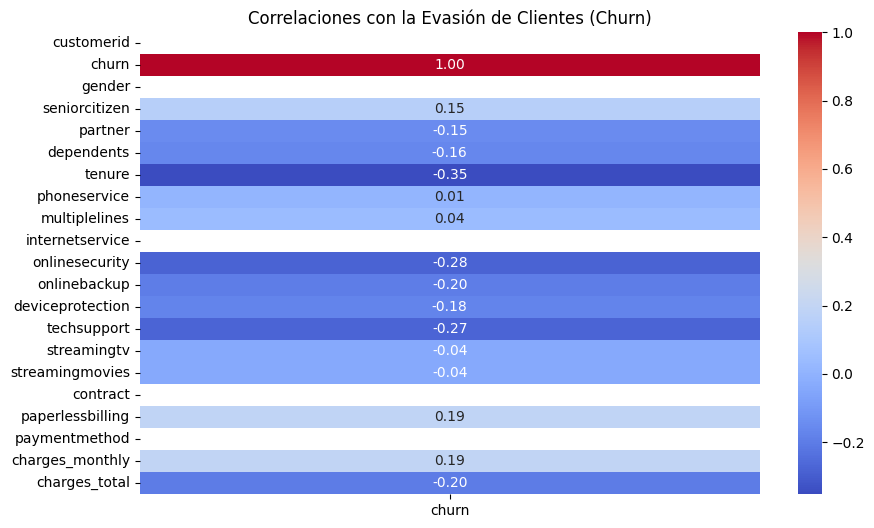

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones[['churn']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones con la Evasión de Clientes (Churn)')
plt.show()

📈 Gráfico de Dispersión – Servicios vs Churn

In [36]:
servicios = [
    'phoneservice', 'multiplelines',
    'internetservice', 'onlinesecurity', 'onlinebackup',
    'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies'
]

In [37]:
df[servicios] = df[servicios].replace({'yes': 1, 'no': 0})

In [38]:
df['total_services'] = df[servicios].sum(axis=1)

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_16092\2241294981.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_services', data=df, palette='Set2')


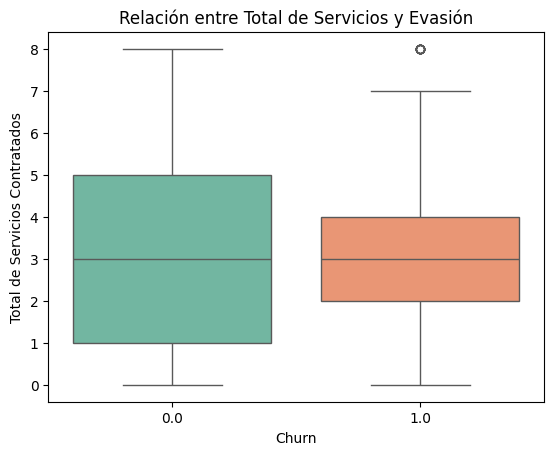

In [39]:
sns.boxplot(x='churn', y='total_services', data=df, palette='Set2')
plt.title('Relación entre Total de Servicios y Evasión')
plt.xlabel('Churn')
plt.ylabel('Total de Servicios Contratados')
plt.show()

#📄Informe final

Informe Final
– Proyecto Telecom X

🔹 Introducción

La empresa Telecom X enfrenta una elevada tasa de cancelación de clientes, lo que representa una amenaza directa a su sostenibilidad y crecimiento. El presente análisis tiene como objetivo identificar patrones y características asociadas a la evasión de clientes (churn) utilizando técnicas de manipulación y visualización de datos en Python. Esta información servirá como base para implementar estrategias de retención más efectivas y nutrir futuros modelos predictivos.

🧹**Limpieza y Tratamiento de Datos**

- Se importaron los datos desde un archivo JSON mediante una API pública.

- Los datos fueron normalizados con json_normalize para aplanar la estructura jerárquica.

- Se renombraron columnas para facilitar la interpretación y estandarización (snake_case).

- Se eliminaron duplicados y se gestionaron valores vacíos y nulos (NaN, campos vacíos).

- Se transformaron valores categóricos como "Sí"/"No" a binarios (1/0) para futuros análisis matemáticos.

- Se ajustaron formatos numéricos (charges_total, charges_monthly, tenure) y se corrigieron inconsistencias textuales (contract, paymentmethod, gender).

🔹 Análisis Exploratorio de Datos
Se realizaron los siguientes análisis para identificar correlaciones con la evasión:

📉 Distribución General de Churn
- La mayoría de los clientes no presentan churn, pero el porcentaje de evasión es relevante y consistente en ciertos perfiles.

📊 Evasión por Variables Categóricas
- El tipo de contrato está fuertemente asociado al churn. Los contratos mensuales muestran mayor tasa de cancelación.

- Métodos de pago como débito automático presentan vulnerabilidad ante la evasión.

- Género y senioridad muestran variaciones menores, pero pueden influir en segmentos específicos.

📈 Evasión por Variables Numéricas
- Clientes con baja permanencia (tenure) tienen mayor tendencia a cancelar el servicio.

- Niveles más altos en charges_monthly correlacionan levemente con churn, posiblemente por percepción de sobreprecio.

- El total acumulado (charges_total) parece estar asociado a clientes más longevos con menor evasión.


🔹 Conclusiones e Insights

- Los clientes con contrato mensual y poca antigüedad son significativamente más propensos a abandonar el servicio.

- Ciertos métodos de pago como débito automático podrían estar generando fricción no detectada en la experiencia del cliente.

- Aunque el churn afecta a todos los perfiles, hay patrones segmentables que pueden orientar acciones puntuales.

🔹 Recomendaciones

- Incentivar contratos a largo plazo con promociones o beneficios exclusivos.
- Mejorar la experiencia en métodos de pago vulnerables, como el débito automático.

- Implementar estrategias de fidelización en los primeros meses de los nuevos clientes.

- Desarrollar un modelo predictivo supervisado alimentado por estos datos para detectar casos potenciales de churn antes de que ocurran.

- Comunicar los hallazgos con claridad a equipos de marketing y atención al cliente para aplicar acciones personalizadas.


